# <center>Concrete Strength Prediction</center>

## Modules

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Initializing the dataframe

In [77]:
df = pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [6]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Exploratory Data Analysis

##### Correlation matrix

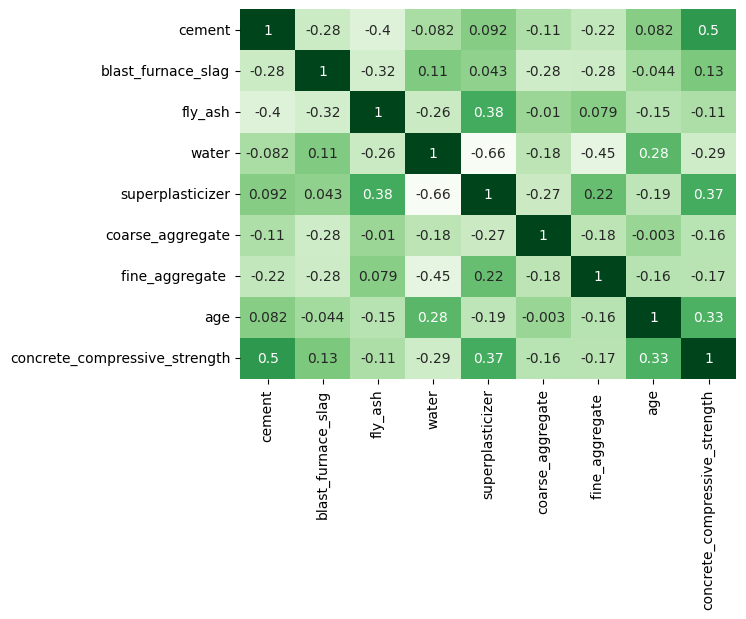

In [10]:
sns.heatmap(data=df.corr(), annot=True, cmap='Greens', cbar=False)
plt.show()

##### Distribution for Compressive Strength

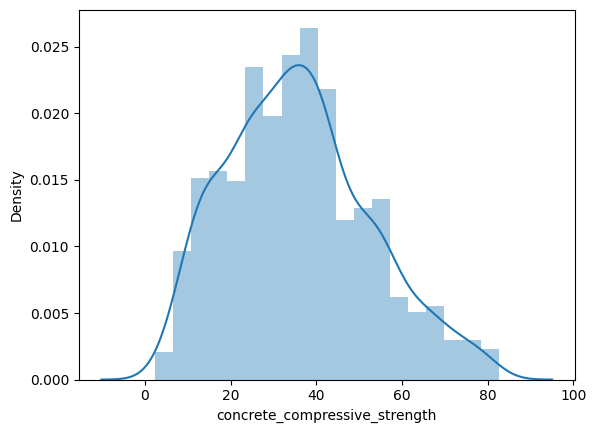

In [18]:
sns.distplot(df['concrete_compressive_strength'])
plt.show()

##### Pair Grid to visualize the relationships between features

<Figure size 1500x1500 with 0 Axes>

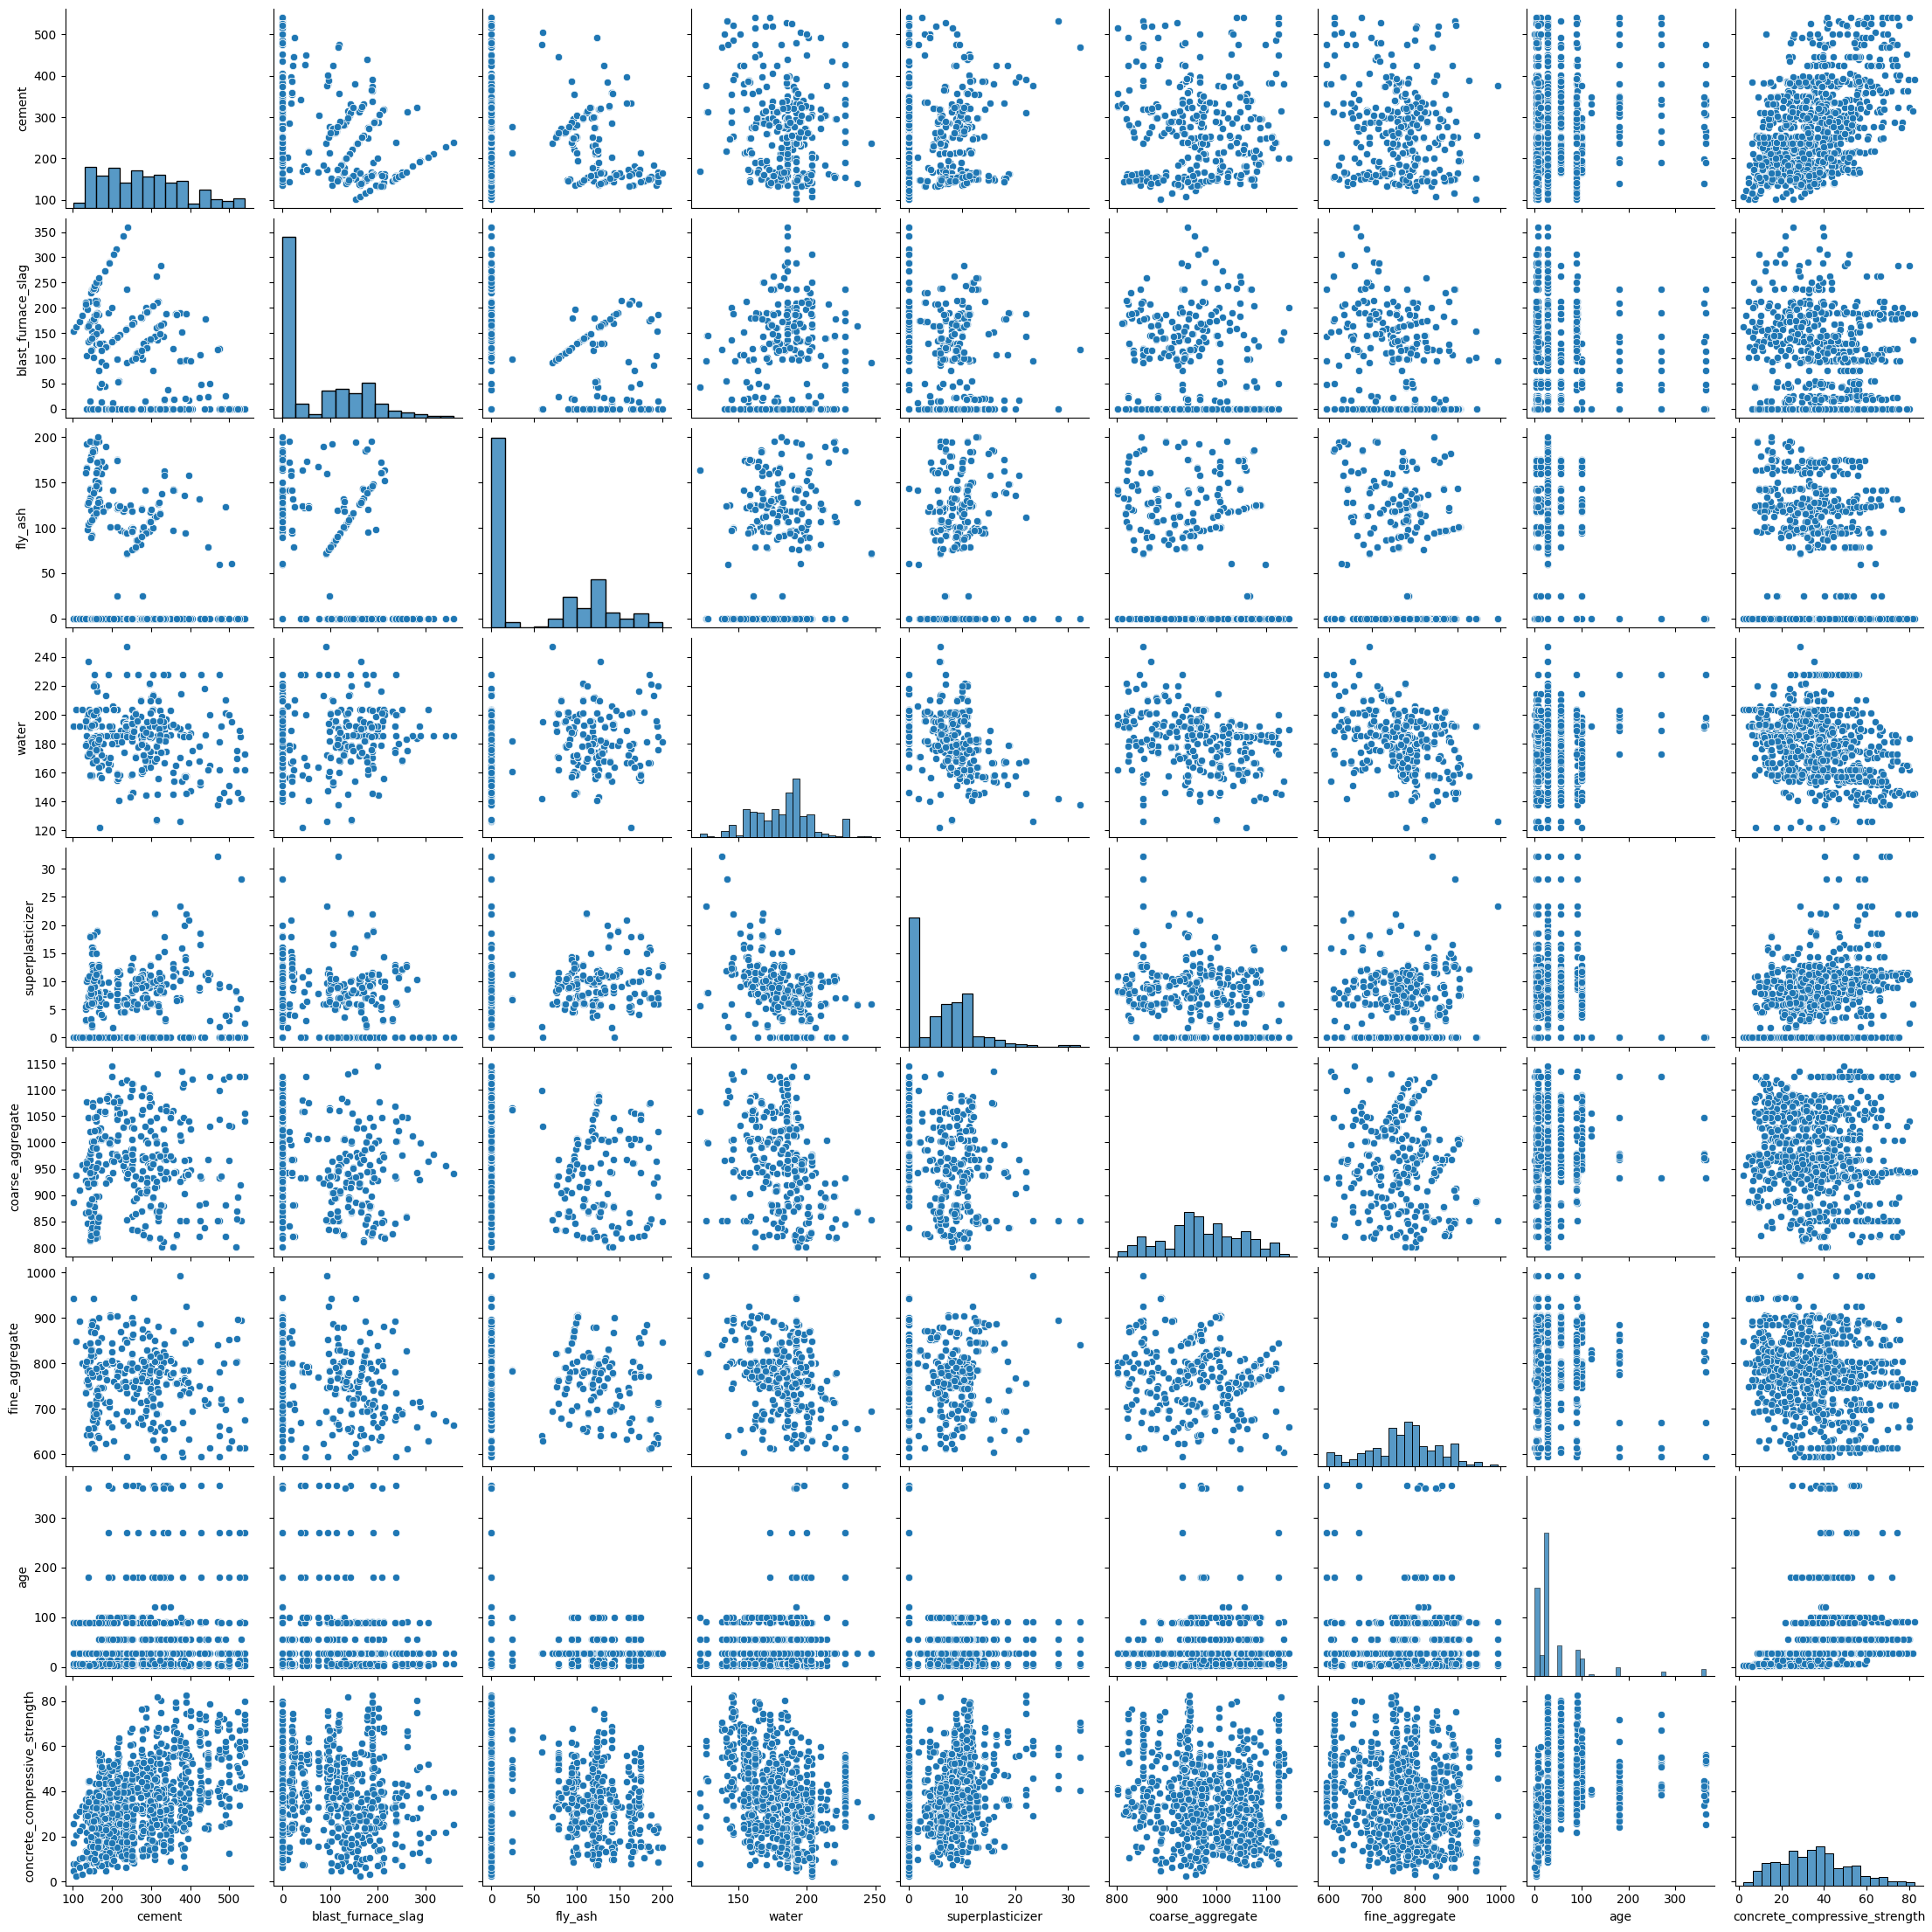

In [27]:
plt.figure(figsize=(15, 15))
sns.pairplot(df)
plt.show()

##### Correlation between the features

In [36]:
sort_corr = df.corr().unstack().sort_values(ascending=False)
sort_corr
print(sort_corr[sort_corr != 1].head(10))
print(sort_corr[sort_corr != 1].tail(10))

concrete_compressive_strength  cement                           0.497832
cement                         concrete_compressive_strength    0.497832
fly_ash                        superplasticizer                 0.377503
superplasticizer               fly_ash                          0.377503
concrete_compressive_strength  superplasticizer                 0.366079
superplasticizer               concrete_compressive_strength    0.366079
concrete_compressive_strength  age                              0.328873
age                            concrete_compressive_strength    0.328873
                               water                            0.277618
water                          age                              0.277618
dtype: float64
water                          concrete_compressive_strength   -0.289633
concrete_compressive_strength  water                           -0.289633
fly_ash                        blast_furnace_slag              -0.323580
blast_furnace_slag             fly_a

##### Cement amount vs Compressive Strength scatterplot

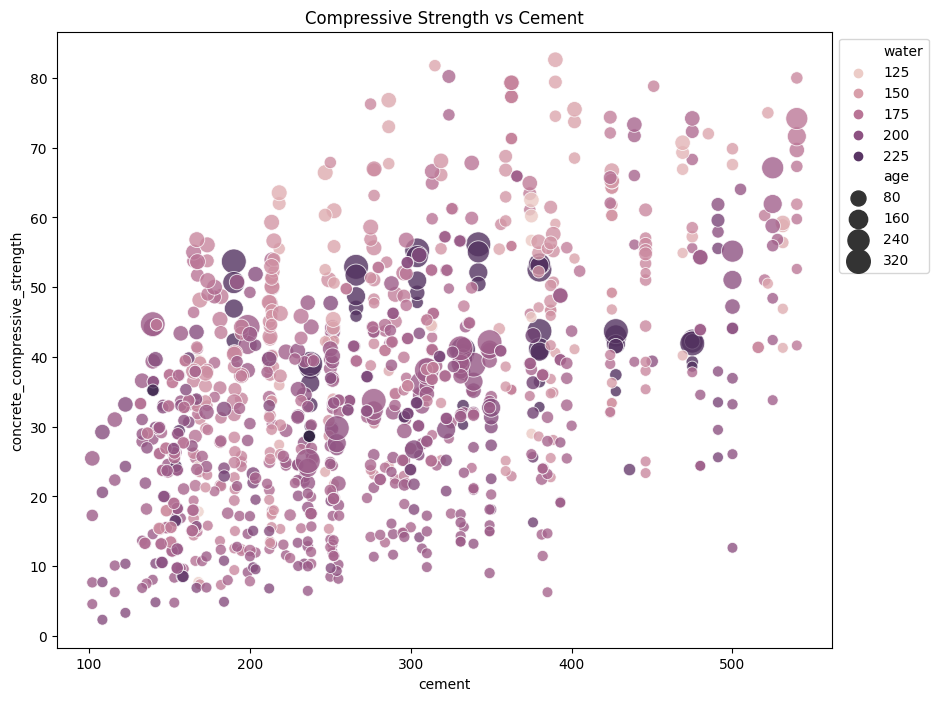

In [48]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, y='concrete_compressive_strength', x='cement', size='age', hue='water', sizes=(60, 320), alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Compressive Strength vs Cement')
plt.show()

##### Coarse Aggregate vs Compressive Strength scatterplot

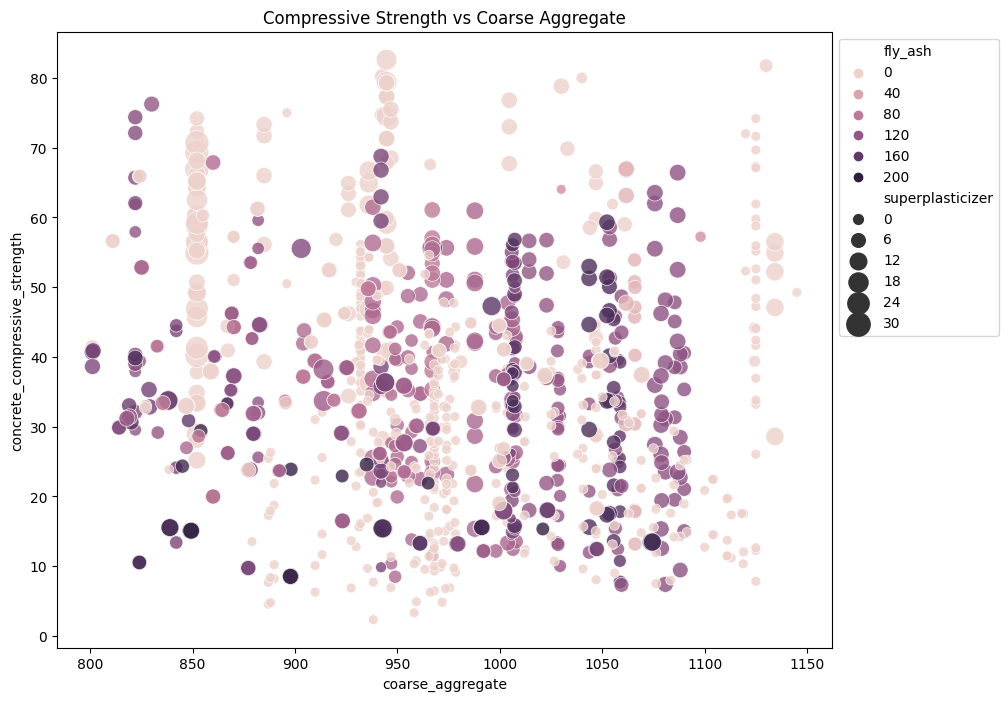

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, y='concrete_compressive_strength', x='coarse_aggregate', size='superplasticizer', hue='fly_ash', 
                sizes=(50, 300), alpha=0.8)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Compressive Strength vs Coarse Aggregate')
plt.show()

## Model Training

In [103]:
X = df.drop(columns='concrete_compressive_strength')
y = df['concrete_compressive_strength']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Apply Models

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
ridge_alpha = RidgeCV(cv=10)
ridge_alpha.fit(X_train, y_train)
alpha = ridge_alpha.alpha_

ridge = Ridge(alpha=alpha, random_state=42)
ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [108]:
lasso_alpha = LassoCV(cv=10)
lasso_alpha.fit(X_train, y_train)
alpha = lasso_alpha.alpha_

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.11066734161903333, random_state=42)

In [109]:
en_alpha = ElasticNetCV(cv=10)
en_alpha.fit(X_train, y_train)
alpha = en_alpha.alpha_

en = ElasticNet(alpha=alpha, random_state=42)
en.fit(X_train, y_train)

ElasticNet(alpha=0.01674315709855175, random_state=42)

##### Testing the model

In [110]:
def make_pred(models, X_test, y_test):
    results = {}
    
    for model in models:
        y_pred = model.predict(X_test)
        results[type(model).__name__] = [mean_squared_error(y_test, y_pred)**(1/2),
                                        mean_absolute_error(y_test, y_pred),
                                        r2_score(y_test, y_pred)]
        
    results = pd.DataFrame(results, index=['RMSE', 'MAE', 'R2'])
    return results

In [111]:
models = [lr, ridge, lasso, en]
make_pred(models, X_test, y_test).T

,RMSE,MAE,R2
LinearRegression,9.796476,7.745559,0.627553
Ridge,9.796178,7.751967,0.627576
Lasso,9.820801,7.829435,0.625701
ElasticNet,9.806979,7.795385,0.626754
